# Identifiing Lego bricks

In this Notebook I will use what I have learned from the [fastai course](https://course.fast.ai/) part one to three. I found this nice lego brick dataset on Kaggle. Thanks to [Francesco Garcia](https://www.kaggle.com/pacogarciam3/lego-brick-sorting-image-recognition), who made a lot  of pictures of different bricks. 
I show how I trained a CNN on resnet34 and resnet50.

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import shutil
from zipfile import ZipFile
from IPython.display import display, Image

### Data Import from Kaggle

In [3]:
! {sys.executable} -m pip install kaggle --upgrade

     |████████████████████████████████| 61kB 3.5MB/s eta 0:00:011
     |████████████████████████████████| 81kB 5.9MB/s  eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.6-cp37-none-any.whl size=72859 sha256=8c639412a2863d4ca750a063310b004eb235f4f6967c717c54e6d2779dabbd25
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5487 sha256=cb6a3f072a028e27823d12e95dfb150948c8586cfdd6df4eba26dee47dc4f7e6
  Stored in directory: /root/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify


In [4]:
path = Config.data_path()/'/workspace/course-v3/nbs/dl1/lego/'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/workspace/course-v3/nbs/dl1/lego')

In [5]:
cd /root/

/root


In [6]:
mkdir .kaggle

In [7]:
cd /workspace/course-v3/nbs/dl1/lego/

/workspace/course-v3/nbs/dl1/lego


In [9]:
original = r'/workspace/kaggle.json'
target = r'/root/.kaggle/kaggle.json'

shutil.move(original,target)

!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d pacogarciam3/lego-brick-sorting-image-recognition

 99%|███████████████████████████████████████▌| 609M/616M [00:37<00:00, 33.1MB/s]
100%|████████████████████████████████████████| 616M/616M [00:37<00:00, 17.4MB/s]


In [11]:
with ZipFile('lego-brick-sorting-image-recognition.zip', 'r') as zip: 
    zip.extractall() 

In [12]:
ls

'Base Images'/             'base images'/
'Cropped Images'/          'cropped images'/
 ImageSetKey.csv           'example_1_Cropped Image.jpg'
 Image_Count_Summary.jpg   'example_2_Base Image.jpg'
 background_backlit_A.jpg   lego-brick-sorting-image-recognition.zip
 background_backlit_B.jpg


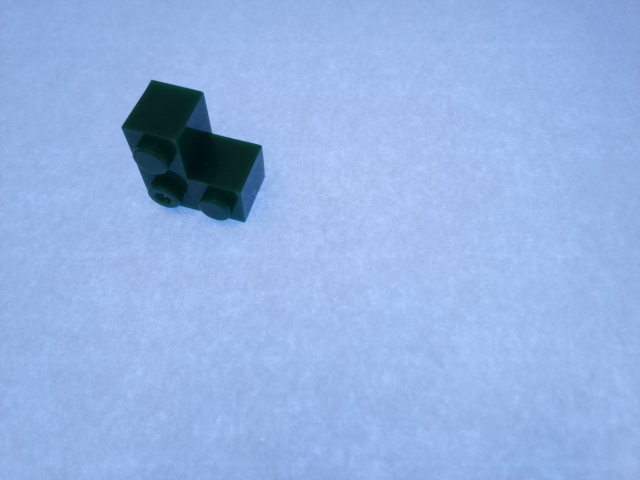

In [307]:
display(Image(filename='/workspace/course-v3/nbs/dl1/lego/Base Images/Brick_2x2_L/2_Brick_2x2_L_180714193455.jpg'))

In [17]:
isk = pd.read_csv('ImageSetKey.csv')

In [18]:
isk

,Folder1,Folder2,Name,Brick Type
0,Cropped Images,Brick_1x1,1_Brick_1x1_180708133346.jpg,Brick 1x1
1,Cropped Images,Brick_1x1,1_Brick_1x1_180708133400.jpg,Brick 1x1
2,Cropped Images,Brick_1x1,1_Brick_1x1_180708133725.jpg,Brick 1x1
3,Cropped Images,Brick_1x1,1_Brick_1x1_180708133739.jpg,Brick 1x1
4,Cropped Images,Brick_1x1,1_Brick_1x1_180708133753.jpg,Brick 1x1
...,...,...,...,...
9155,Base Images,Plate_2x4,2_Plate_2x4_180714163404.jpg,Plate 2x4
9156,Base Images,Plate_2x4,2_Plate_2x4_180714163549.jpg,Plate 2x4
9157,Base Images,Plate_2x4,2_Plate_2x4_180714163614.jpg,Plate 2x4
9158,Base Images,Plate_2x4,2_Plate_2x4_180714163941.jpg,Plate 2x4


## Looking at the data

In [203]:
tfms = get_transforms(flip_vert=True)
data = ImageDataBunch.from_folder(path/'Base Images', ds_tfms=tfms, size=(120,160), valid_pct = 0.2)

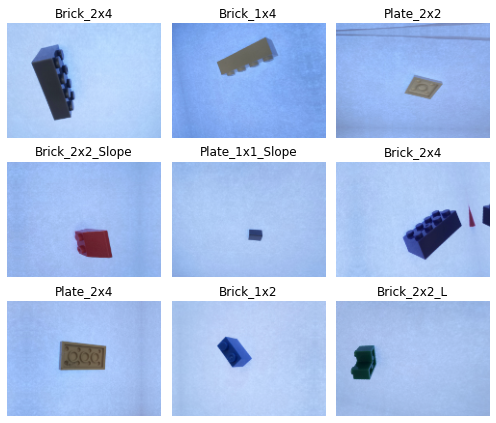

In [207]:
data.show_batch(rows=3, figsize=(7,6))

In [208]:
print(data.classes)
len(data.classes),data.c

['Brick_1x1', 'Brick_1x2', 'Brick_1x3', 'Brick_1x4', 'Brick_2x2', 'Brick_2x2_L', 'Brick_2x2_Slope', 'Brick_2x3', 'Brick_2x4', 'Plate_1x1', 'Plate_1x1_Round', 'Plate_1x1_Slope', 'Plate_1x2', 'Plate_1x2_Grill', 'Plate_1x3', 'Plate_1x4', 'Plate_2x2', 'Plate_2x2_L', 'Plate_2x3', 'Plate_2x4']


(20, 20)

## Training: resnet34

In [224]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


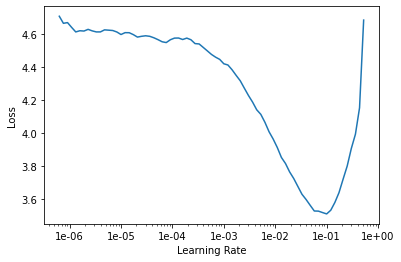

In [23]:
learn.lr_find()
learn.recorder.plot()

After many tryouts, a bigger learning rate seems to work best, followed by a smaller one.

In [226]:
learn.fit_one_cycle(8, slice(7e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.454497,1.366635,0.409389,00:11
1,1.933866,1.390181,0.382096,00:11
2,1.571198,0.809790,0.263100,00:10
3,1.365644,0.988988,0.325328,00:10
4,1.004229,0.681745,0.191048,00:10
5,0.737355,0.241512,0.078603,00:10
6,0.517144,0.183390,0.064410,00:10
7,0.412503,0.182984,0.064410,00:11


In [227]:
learn.fit_one_cycle(20, slice(2e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.339255,0.178600,0.063319,00:11
1,0.342428,0.183002,0.063319,00:11
2,0.360299,0.215217,0.075328,00:10
3,0.385588,0.292789,0.099345,00:11
4,0.416100,0.354805,0.114629,00:11
5,0.455012,0.462846,0.141921,00:11
6,0.467943,0.362166,0.102620,00:10
7,0.458083,0.223703,0.074236,00:10
8,0.411751,0.203889,0.065502,00:10
9,0.388937,0.240778,0.076419,00:10


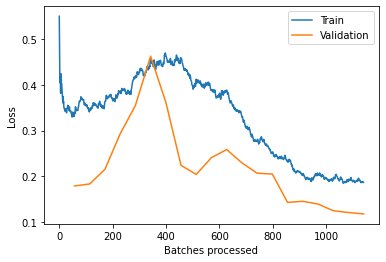

In [228]:
learn.recorder.plot_losses()

In [229]:
learn.save('stage-1')

In [242]:
learn.load('stage-1');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


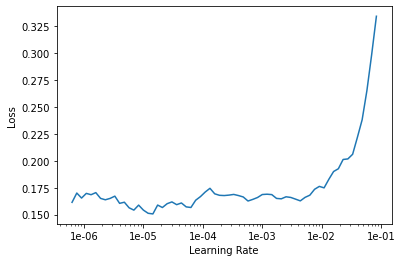

In [230]:
learn.lr_find()
learn.recorder.plot()

In [238]:
learn.fit_one_cycle(4, slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.180519,0.111403,0.042576,00:11
1,0.170770,0.116565,0.040393,00:10
2,0.159370,0.119391,0.039301,00:10
3,0.169489,0.161264,0.038210,00:10


In [239]:
learn.save('stage-1-2')

In [269]:
learn.load('stage-1-2');

Traceback (most recent call last):


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


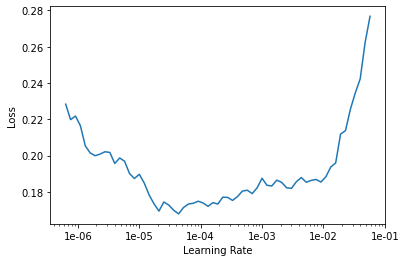

In [256]:
learn.lr_find()
learn.recorder.plot()

In [270]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.168053,0.168012,0.040393,00:10
1,0.170324,0.117181,0.036026,00:11
2,0.176924,0.114176,0.037118,00:11
3,0.173169,0.111086,0.038210,00:11
4,0.180995,0.097085,0.033843,00:10
5,0.173177,0.110650,0.034934,00:10
6,0.169445,0.105627,0.033843,00:10
7,0.173072,0.124482,0.036026,00:11
8,0.166598,0.098004,0.029476,00:11
9,0.161900,0.131109,0.040393,00:10


It does not seem to get better anymore, so I unfreeze it to train all the layers.

In [271]:
learn.save('stage-2-1')

In [275]:
learn.load('stage-2-1');

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


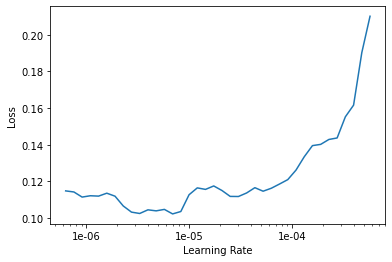

In [272]:
learn.lr_find()
learn.recorder.plot()

In [273]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-7,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.127045,0.087497,0.029476,00:11
1,0.125490,0.088452,0.029476,00:11
2,0.134781,0.091879,0.027293,00:12
3,0.127097,0.092212,0.030568,00:12
4,0.134749,0.095093,0.027293,00:11
5,0.125789,0.096245,0.030568,00:10
6,0.133559,0.093170,0.028384,00:10
7,0.120951,0.092031,0.029476,00:10
8,0.120843,0.090243,0.027293,00:10
9,0.126482,0.094817,0.027293,00:10


In [274]:
learn.save('stage-2-2')

In [280]:
learn.load('stage-2-2');

That looks reasonably good. The train_loss is still higher than the valid_loss, so the model is still underfitting, but an error rate of 2.7% is good enough for now. Let's see if resnet50 will perform better...

## Resnet 50

In [283]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


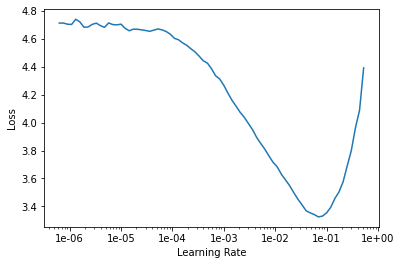

In [285]:
learn.lr_find()
learn.recorder.plot()

In [286]:
learn.fit_one_cycle(8, slice(7e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.092498,1.881174,0.437773,00:12
1,1.819227,1.032634,0.271834,00:12
2,1.385215,1.097468,0.298035,00:12
3,1.115198,1.561444,0.336245,00:12
4,0.861129,0.370810,0.093886,00:11
5,0.603446,0.297304,0.097162,00:12
6,0.407665,0.150647,0.051310,00:12
7,0.311949,0.293816,0.054585,00:12


In [287]:
learn.fit_one_cycle(20, slice(2e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.250607,0.146850,0.048035,00:12
1,0.226000,0.184501,0.042576,00:12
2,0.230524,0.175474,0.053493,00:12
3,0.290077,0.199243,0.051310,00:12
4,0.324031,0.266186,0.078603,00:12
5,0.392624,0.210889,0.072052,00:12
6,0.337277,0.321624,0.090611,00:11
7,0.328803,0.244212,0.082969,00:11
8,0.368730,0.287094,0.080786,00:11
9,0.326699,0.272045,0.068777,00:11


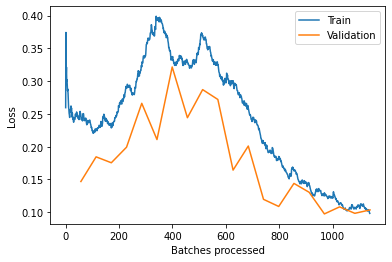

In [288]:
learn.recorder.plot_losses()

In [289]:
learn.save('stage-1-50')

In [290]:
learn.load('stage-1-50');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


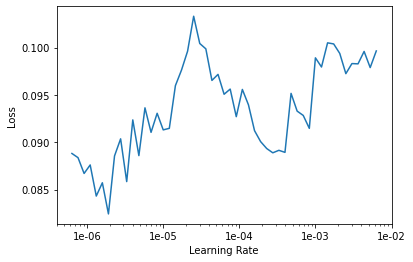

In [291]:
learn.lr_find()
learn.recorder.plot()

In [292]:
learn.fit_one_cycle(4, slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.093884,0.107199,0.032751,00:12
1,0.098751,0.102710,0.033843,00:12
2,0.093213,0.097283,0.031659,00:12
3,0.084832,0.096180,0.033843,00:11


In [293]:
learn.save('stage-1-2-50')

In [294]:
learn.load('stage-1-2-50');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


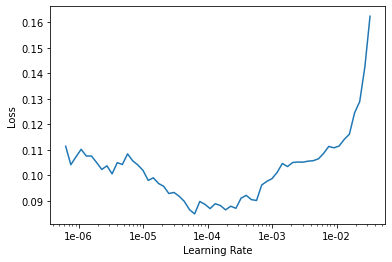

In [295]:
learn.lr_find()
learn.recorder.plot()

In [296]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.105299,0.097590,0.030568,00:16
1,0.100494,0.091623,0.034934,00:15
2,0.096020,0.098321,0.031659,00:14
3,0.092416,0.104101,0.032751,00:14
4,0.091387,0.087126,0.027293,00:15
5,0.100068,0.079791,0.022926,00:14
6,0.096145,0.077915,0.022926,00:15
7,0.096186,0.078397,0.022926,00:14
8,0.090346,0.063473,0.019651,00:15
9,0.087277,0.071454,0.028384,00:15


In [297]:
learn.save('stage-2-1-50')

In [302]:
learn.load('stage-2-1-50');

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try if the predictions are reasonable or not (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other.

In [303]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

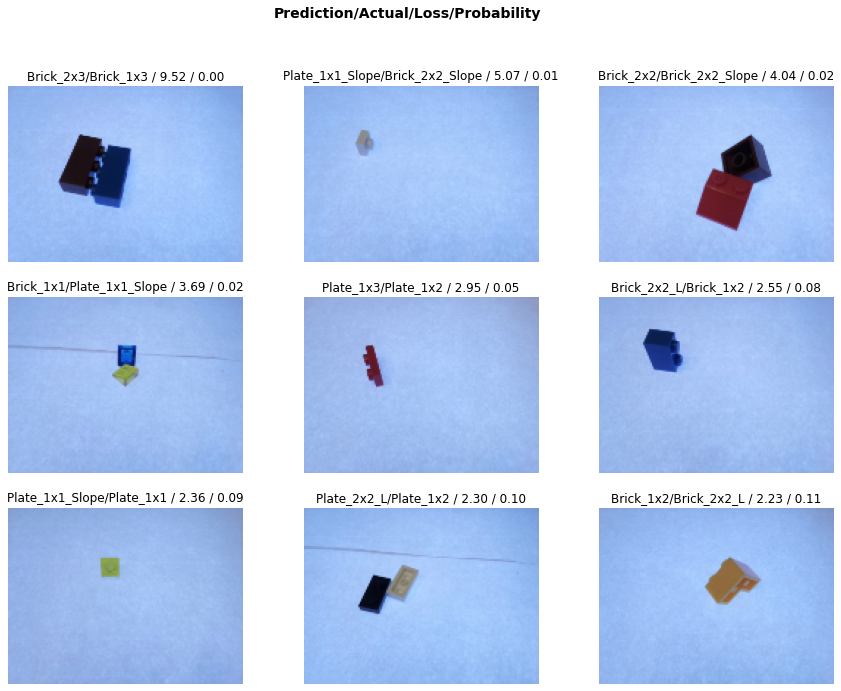

In [304]:
interp.plot_top_losses(9, figsize=(15,11))

As we can see, the neural net has difficulties if pictures contain more than one object.

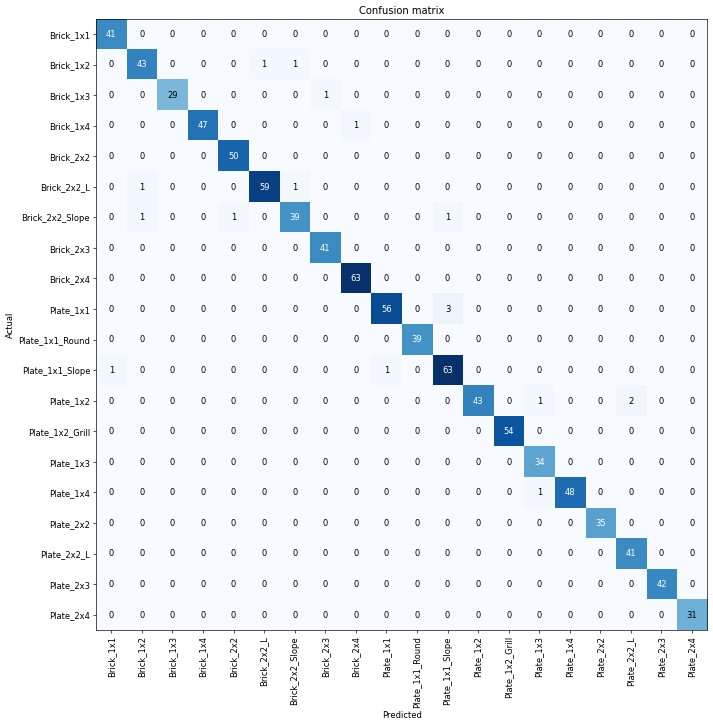

In [305]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [306]:
interp.most_confused(min_val=2)

[('Plate_1x1', 'Plate_1x1_Slope', 3), ('Plate_1x2', 'Plate_2x2_L', 2)]

The neural net confuses only two bricks with each other more than once. They both seem reasonable misinterpretations since the look alike very much from a certain angle. 